## ```NoteBook Focus```
---
1. Exploring the data to see what the data says.
2. Most of the EDA was done through a "Try and test" analysis by fitting models and checking for overfitting and unusually high accuracy.

## ```Imports```
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [3]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'educatn', 'intdum', 'methmin', 'monrace', 'monsex', 'mweight',
       'newcit', 'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen',
       'offguide', 'prisdum', 'probatn', 'probdum', 'quarter', 'reas1',
       'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
       'safety', 'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1',
       'sources', 'statmax', 'statmin', 'supermax', 'supermin', 'suprdum',
       'suprel', 'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
       'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor',
       'xminsor', 'sentrnge'],
      dtype='object')

## ```EDA1```
---
1. General EDA, checking for multicolinearity, etc..

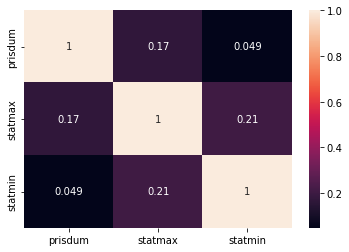

In [4]:
sns.heatmap(drugs[['prisdum', 'statmax', 'statmin']].corr(), annot=True);

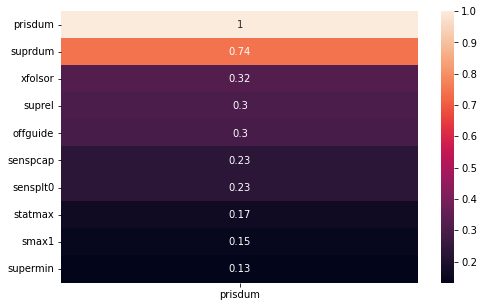

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(drugs.corr()[['prisdum']].sort_values(by='prisdum', ascending=False).head(10), annot=True);

**The only feature that stands out as being highly correlated is 'suprdum' (Indicates whether the defendant received supervised release). This feature will be removed from all models to see how models perform. What i'm expecting is that a model missing this information will perform worst.**

## EDA2
---
1. Trying to identify which features are making the model on unbalanced classes work well. 

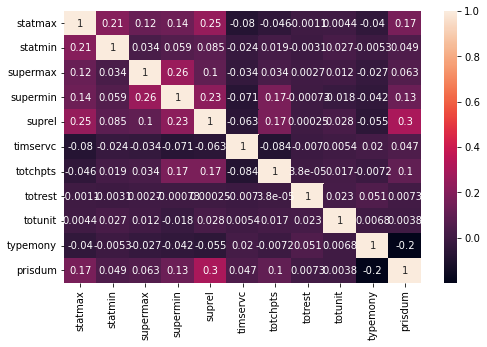

In [6]:
df = drugs[['statmax', 'statmin', 'supermax', 'supermin','suprel','timservc', 'totchpts', 'totrest', 'totunit', 'typemony','prisdum']]
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True);

In [7]:
drugs['casetype'].value_counts()

1.0    16411
2.0      418
Name: casetype, dtype: int64